In [298]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#Tive que tirar o email da list pois estava dando um erro no SelectKBest
features_list = ['poi','salary','bonus','total_payments','deferral_payments','exercised_stock_options',
                     'restricted_stock','restricted_stock_deferred','total_stock_value','expenses',
                     'other','director_fees','loan_advances','deferred_income','long_term_incentive',
                     'from_poi_to_this_person','from_this_person_to_poi','to_messages','from_messages',
                     'shared_receipt_with_poi']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df= pd.DataFrame.from_dict(data_dict,orient = 'index')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
director_fees                146 non-null object
deferred_income              146 non-null object


In [300]:
df

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818,NaN,684694,860136,1599641,NaN,NaN,NaN,NaN,1599641,...,NaN,NaN,874,NaN,False,NaN,NaN,93750,NaN,NaN
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
BELDEN TIMOTHY N,213999,7991,2144013,5501630,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582,NaN,NaN,228474,1624396,NaN,869220,NaN,NaN,2493616,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


Entendimento dos Dados e da Pergunta

In [301]:
#Quantidade de dados
print len(df)

#Quantidade de POIs
print sum(df['poi']==1)

#Quantidade de não POIs
print sum(df['poi']==0)

##quantidade de atributos
print df.info()

#Existe muitas caracteristicas faltando?
df = df.replace('NaN',np.nan)
df.isnull().sum()

146
18
128
<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
director_fees                146 non-null object
deferred_income              146 non-n

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 35
from_poi_to_this_person       60
dtype: int64

In [302]:
df.to_csv('enron_lista.csv',sep=',')

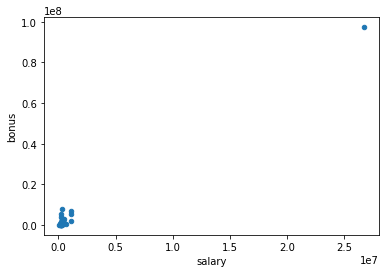

In [303]:
df.plot.scatter(x = 'salary', y = 'bonus')

In [304]:
df['salary'].idxmax()

'TOTAL'

In [305]:
data_dict.keys()

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

In [306]:
### Task 2: Remove outliers
data_dict.pop('TOTAL')
#Creio que seja um Outlier tb, pois se trata de uma empresa
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')
#Creio que seja um Outlier, pois não tem nenhuma informação nessa pessoa
data_dict.pop('LOCKHART EUGENE E')
print "Original Length", len(data_dict)

Original Length 143


In [307]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict
#Criando novas features - % de emails recebidos de POI e % de emails enviados para POI
#Aula 12. 2
for key,value in my_dataset.items():
    if value['to_messages'] != 'NaN' or value['from_poi_to_this_person'] != 'NaN':
            value['percentage_messages_from_poi'] = float(value['from_poi_to_this_person']) / float(value['to_messages'])
    else:
        value['percentage_messages_from_poi']=0.0
        
    if value['from_messages'] != 'NaN' or value['from_this_person_to_poi'] != 'NaN':
            value['percentage_messages_to_poi'] = float(value['from_this_person_to_poi']) / float(value['from_messages'])
    else:
        value['percentage_messages_to_poi']=0.0

#Feature de quantidade de 'contato' com POIs

#Adicionando as novas features na features_list
features_list.append('percentage_messages_to_poi')
features_list.append('percentage_messages_from_poi')       


In [308]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

#Select features according to the k highest scores. http://scikit-learn.org/stable/modules/feature_selection.html
from sklearn.feature_selection import SelectKBest,chi2
selector = SelectKBest(k='all').fit(features,labels)
print selector.scores_
results = pd.DataFrame(selector.scores_,
                          index=features_list[1:])

results.columns = ['Importancia']
results.sort_values(['Importancia'],ascending=False)

[18.28968404 20.79225205  8.77277773  0.22461127 24.81507973  9.21281062
  0.06549965 24.18289868  6.09417331  4.18747751  2.1263278   7.18405566
 11.45847658  9.92218601  5.24344971  2.38261211  1.64634113  0.16970095
  8.58942073 16.40971255  3.12809175]


,Importancia
exercised_stock_options,24.815080
total_stock_value,24.182899
bonus,20.792252
salary,18.289684
percentage_messages_to_poi,16.409713
deferred_income,11.458477
long_term_incentive,9.922186
restricted_stock,9.212811
total_payments,8.772778
shared_receipt_with_poi,8.589421


In [309]:
### The first feature must be "poi".
#Atualizando a feature_list com as features selecionadas pelo SelectKBest
features_list = ['poi','exercised_stock_options','total_stock_value','bonus','salary','percentage_messages_to_poi',
                 'deferred_income']

In [310]:
### Extract features and labels from dataset for local testing (Com as features selecionadas)
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [311]:
#Scalling features http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#Aula 10.11
#https://www.youtube.com/watch?v=8I1tAjGsAb8
#update na features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features)

In [312]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

#Criando os test e train
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)

#Aula 14. 12 Validação
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

#Importando as métricas para avaliação
from sklearn.metrics import precision_score, recall_score,f1_score
from tester import dump_classifier_and_data,test_classifier

# Provided to give you a starting point. Try a variety of classifiers.
from time import time
t0 = time()

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
parameters = {}
clfNB = GaussianNB()
clfNB= GridSearchCV(clfNB, parameters)
clfNB.fit(features_train,labels_train)
clfNB = clfNB.best_estimator_
print "\nGaussianNB:\n",test_classifier(clfNB,my_dataset,features_list)



GaussianNB:
GaussianNB(priors=None)
	Accuracy: 0.86050	Precision: 0.51572	Recall: 0.38550	F1: 0.44120	F2: 0.40600
	Total predictions: 14000	True positives:  771	False positives:  724	False negatives: 1229	True negatives: 11276

None


In [313]:
#Decision Tree
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
#http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html
from sklearn import tree

param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

clfDT = tree.DecisionTreeClassifier()
clfDT = GridSearchCV(clfDT,param_grid)

clfDT.fit(features_train,labels_train)
clfDT = clfDT.best_estimator_
print "\nDecision Tree Classifier Test Point:\n",test_classifier(clfDT,my_dataset,features_list)
print


Decision Tree Classifier Test Point:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.81757	Precision: 0.23314	Recall: 0.12100	F1: 0.15932	F2: 0.13388
	Total predictions: 14000	True positives:  242	False positives:  796	False negatives: 1758	True negatives: 11204

None



In [314]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [315]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

clf = clfNB
dump_classifier_and_data(clf, my_dataset, features_list)